# Excersize

Finish MNIST kaggle chalange using CNN.

https://www.kaggle.com/c/digit-recognizer

Description

## Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import keras

C:\Users\Alicja\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
img_rows, img_cols = 28, 28
num_classes = 10
num_epochs=12

def data_prep(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes)

    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [4]:
train_file = "MNIST_train.csv"
raw_data = pd.read_csv(train_file)

x, y = data_prep(raw_data)

In [5]:
raw_data.shape

(42000, 785)

## Train Model

In [21]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D





model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x, y,
          batch_size=128,
          epochs=num_epochs,
          validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/12
33600/33600 [==============================] - 41s 1ms/step - loss: 0.4101 - acc: 0.8730 - val_loss: 0.0966 - val_acc: 0.9695
Epoch 2/12
33600/33600 [==============================] - 41s 1ms/step - loss: 0.1171 - acc: 0.9636 - val_loss: 0.0596 - val_acc: 0.9799
Epoch 3/12
33600/33600 [==============================] - 41s 1ms/step - loss: 0.0820 - acc: 0.9749 - val_loss: 0.0489 - val_acc: 0.9854
Epoch 4/12
33600/33600 [==============================] - 40s 1ms/step - loss: 0.0647 - acc: 0.9796 - val_loss: 0.0457 - val_acc: 0.9848
Epoch 5/12
33600/33600 [==============================] - 40s 1ms/step - loss: 0.0561 - acc: 0.9822 - val_loss: 0.0420 - val_acc: 0.9868
Epoch 6/12
33600/33600 [==============================] - 41s 1ms/step - loss: 0.0484 - acc: 0.9840 - val_loss: 0.0426 - val_acc: 0.9858
Epoch 7/12
33600/33600 [==============================] - 40s 1ms/step - loss: 0.0408 - acc: 0.9874 - val_loss: 0.0394 - val_acc:

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               204928    
__________

In [23]:
model.save('MNIST.h5')

In [33]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


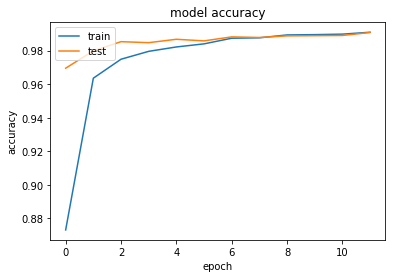

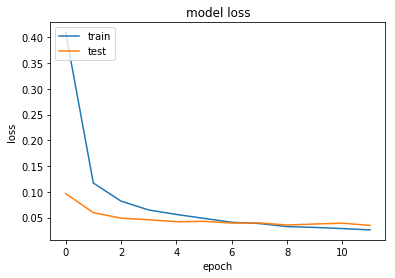

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
raw_x = pd.read_csv('MNIST_test.csv')

In [36]:

num_images = raw_x.shape[0]
x_test_array = raw_x.values[:]
x_test_shaped_array = x_test_array.reshape(num_images, img_rows, img_cols, 1)
x_test = x_test_shaped_array / 255
y_test = model.predict(x_test)

In [37]:
score = model.evaluate(x_test, y_test, batch_size=16)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

28000/28000 [==============================] - 13s 472us/step
Test loss: 0.020166090821834848
Test accuracy: 1.0


In [38]:
y_cat = y_test.argmax(axis=-1)

In [39]:
len(y_cat)

28000

In [40]:
submission = pd.DataFrame(y_cat, columns=['Label'], index=range(1, y_cat.shape[0]+1))

In [41]:
submission.reset_index(inplace=True)

In [42]:
submission.columns = ['ImageId', 'Label']

In [43]:
submission.to_csv('MNIST_submisison.csv', header=True, index=False)